In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [83]:
# CSV 파일 불러오기
df = pd.read_csv("D:/abalone.csv")

# 데이터 확인
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [84]:
# 열 이름 확인
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [85]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


imbalanced data 확인:


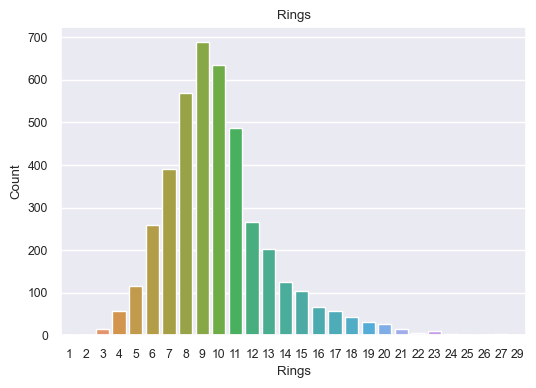

In [86]:
# 레이블 개수 확인(imbalanced data) - 그래프
print("\nimbalanced data 확인:")
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")
plt.show()

In [87]:
# 인코딩(숫자)
label_encoder = LabelEncoder() # LabelEncoder 초기화
columns_to_encode = ['Sex']  # 인코딩할 컬럼 리스트
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
# 인코딩 확인
df # M:2, F:0, I:1

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [88]:
# 레이블 개수 확인(imbalanced data) - 숫자
print("\n레이블 개수 확인:")
df['Rings'].value_counts()


레이블 개수 확인:


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

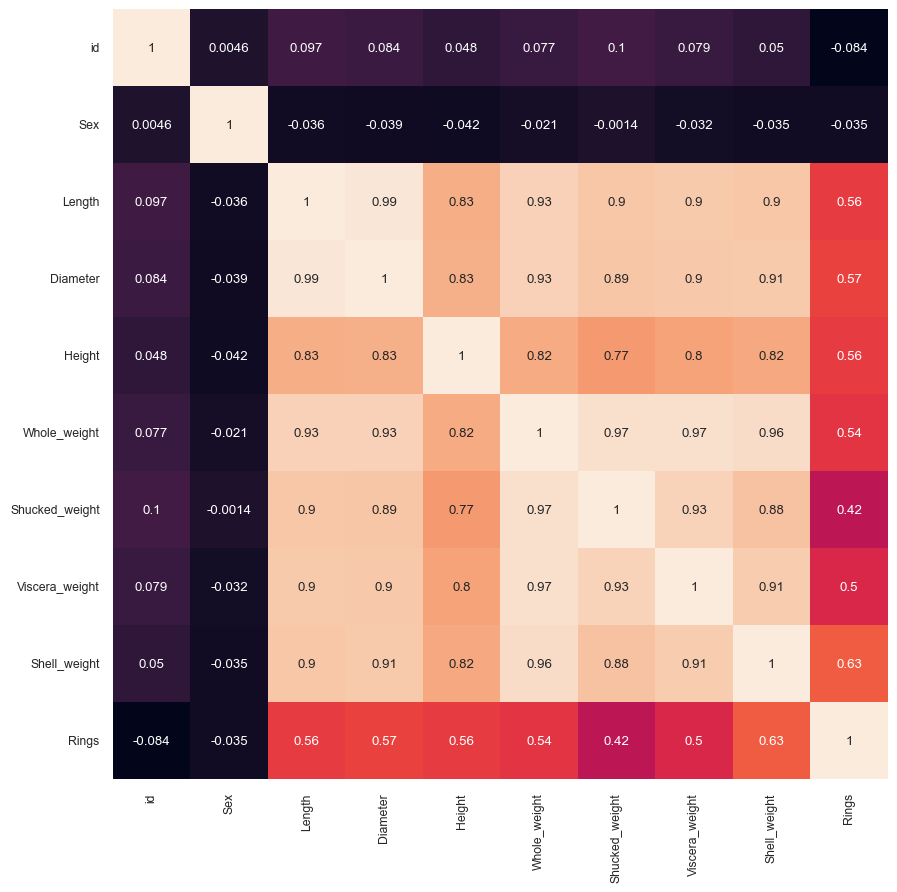

In [89]:
# 상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

# 히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 가장 높은 건 Shell_weight

In [90]:
# 입력(X)과 출력(y) 분리
X = df.drop('Rings',axis=1)
y = df['Rings']

In [91]:
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [92]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [93]:
# 데이터 분할 (훈련 80%, 테스트 20%)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [94]:
# 1. LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.642270862135663
평균제곱근오차 4.642270862135663
평균제곱근오차 4.642270862135667


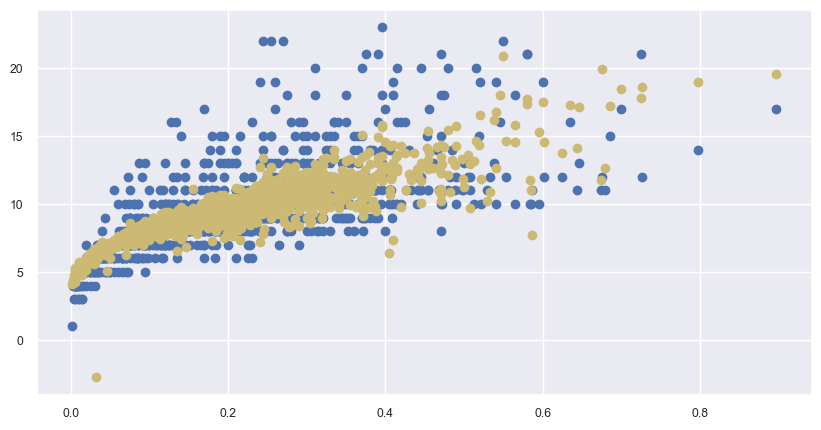

In [95]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [96]:
# 2. DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.064593301435407


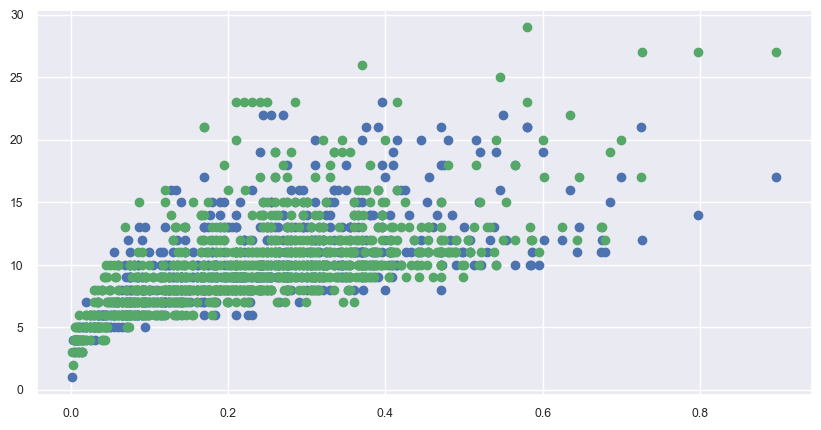

In [97]:
# 예측값과 실제 값 차이를 산점도로 표시, 초록색 예측
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [98]:
# 3. RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 3.3474955741626795


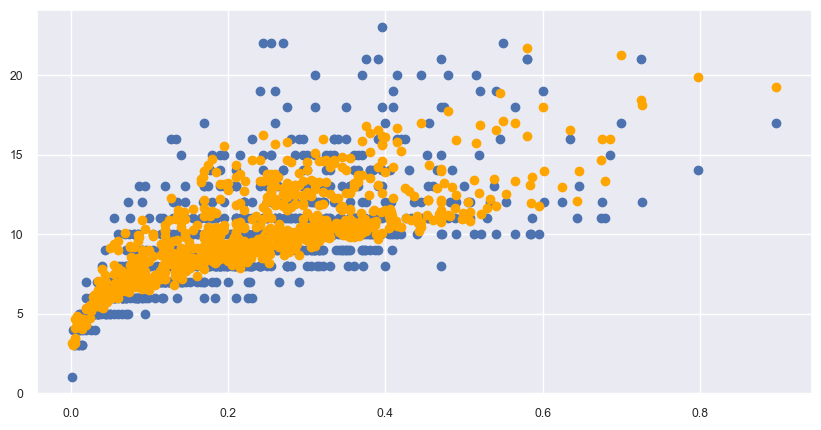

In [99]:
# 예측값과 실제 값 차이를 산점도로 표시, 주황색 예측
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show() 

In [100]:
# 4. SVR
#model = SVR(kernel='linear')
#model.fit(X_train, y_train)
#ry_preds = model.predict(X_test)
#print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

In [101]:
# 예측값과 실제 값 차이를 산점도로 표시, 분홍색 예측
#plt.figure(figsize=(10,5))
#plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
#plt.scatter(X_test['Shell_weight'], ry_preds, c='pink', label='ry_preds')
#plt.show()  